In [17]:
import pandas as pd
import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import requests

In [18]:
jsobject = pd.read_json('ignore/gbfs.json')

In [19]:
resp = requests.get(jsobject['data']['en']['feeds'][3]['url'])
bike_data = resp.json()

In [20]:
df_data = pd.DataFrame(bike_data['data'])

In [21]:
df_bikes = pd.DataFrame(bike_data['data']['bikes'])

In [22]:
df_bikes.rename(columns={'lon':'Longitude','lat':'Latitude'}, inplace=True)
crs = {'init':'epsg:4326'}

In [23]:
df_bikes.dtypes

bike_id         object
fusion_lon       int64
rental_uris     object
Longitude      float64
name            object
is_reserved      int64
is_disabled      int64
type            object
Latitude       float64
fusion_lat       int64
dtype: object

In [24]:
df_bikes.head()

,bike_id,fusion_lon,rental_uris,Longitude,name,is_reserved,is_disabled,type,Latitude,fusion_lat
0,a77064d3959f850f0ff4ad1cb3a1b2b4,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-77.026448,a77064d3959f850f0ff4ad1cb3a1b2b4,0,0,electric_bike,38.984323,0
1,b81a187bcd76273905248e20f554fb46,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-76.955432,b81a187bcd76273905248e20f554fb46,0,0,electric_bike,38.923395,0
2,97e752bfa260ebd0eb03217d441b0b5a,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-76.977305,97e752bfa260ebd0eb03217d441b0b5a,0,0,electric_bike,38.915942,0
3,22691c15be7d4d87596c7bc7bc4b1070,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-77.024698,22691c15be7d4d87596c7bc7bc4b1070,0,0,electric_bike,38.938685,0
4,f94c193a3432d1d74d1328c69c550a2f,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-77.131736,f94c193a3432d1d74d1328c69c550a2f,0,0,electric_bike,38.845267,0


In [25]:
street_map = gpd.read_file('ignore/tl_2018_11001_roads/tl_2018_11001_roads.shp')

<AxesSubplot:>

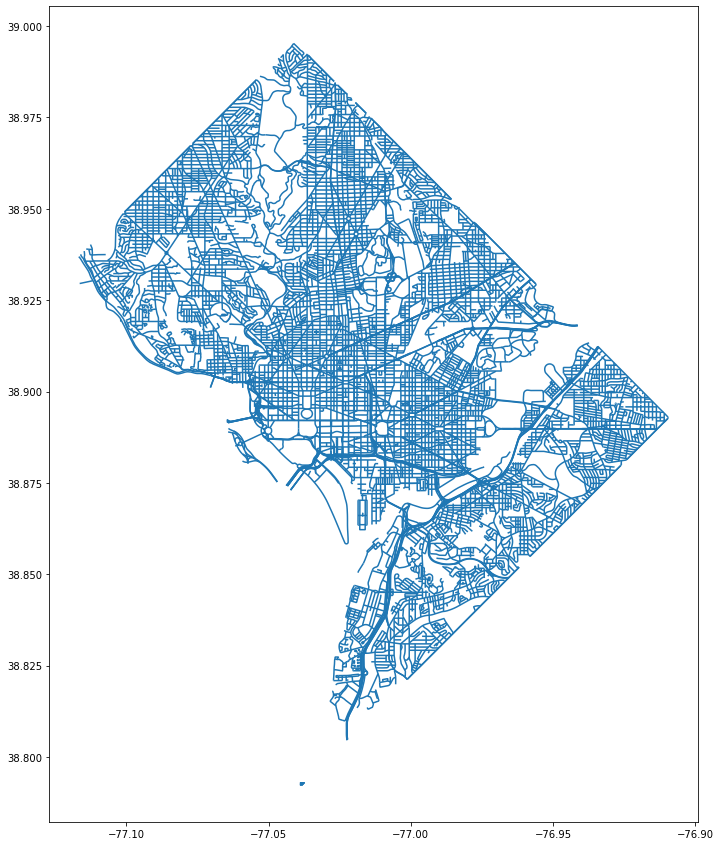

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [27]:
geometry = [Point(xy) for xy in zip(df_bikes['Longitude'], df_bikes['Latitude'])]

In [28]:
geometry[:3]

[<POINT (-77.026 38.984)>, <POINT (-76.955 38.923)>, <POINT (-76.977 38.916)>]

In [29]:
geo_df = gpd.GeoDataFrame(df_bikes, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/maxremme/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,bike_id,fusion_lon,rental_uris,Longitude,name,is_reserved,is_disabled,type,Latitude,fusion_lat,geometry
0,a77064d3959f850f0ff4ad1cb3a1b2b4,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-77.026448,a77064d3959f850f0ff4ad1cb3a1b2b4,0,0,electric_bike,38.984323,0,POINT (-77.02645 38.98432)
1,b81a187bcd76273905248e20f554fb46,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-76.955432,b81a187bcd76273905248e20f554fb46,0,0,electric_bike,38.923395,0,POINT (-76.95543 38.92340)
2,97e752bfa260ebd0eb03217d441b0b5a,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-76.977305,97e752bfa260ebd0eb03217d441b0b5a,0,0,electric_bike,38.915942,0,POINT (-76.97730 38.91594)
3,22691c15be7d4d87596c7bc7bc4b1070,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-77.024698,22691c15be7d4d87596c7bc7bc4b1070,0,0,electric_bike,38.938685,0,POINT (-77.02470 38.93869)
4,f94c193a3432d1d74d1328c69c550a2f,0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,-77.131736,f94c193a3432d1d74d1328c69c550a2f,0,0,electric_bike,38.845267,0,POINT (-77.13174 38.84527)


In [30]:
geo_df = geo_df.to_crs(street_map.crs)

In [31]:
geo_df.isna().sum()

bike_id        0
fusion_lon     0
rental_uris    0
Longitude      0
name           0
is_reserved    0
is_disabled    0
type           0
Latitude       0
fusion_lat     0
geometry       0
dtype: int64

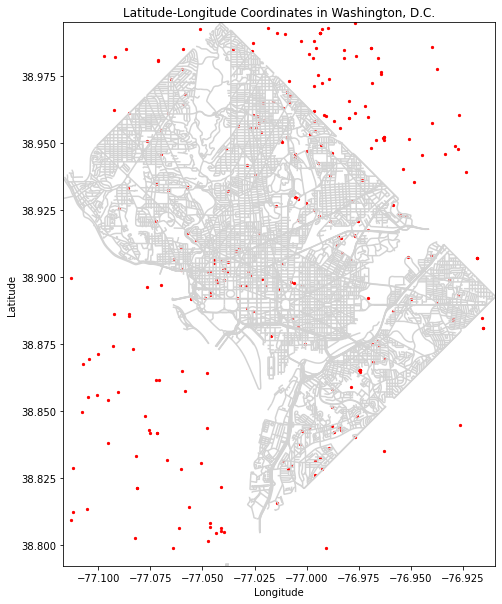

In [32]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Washington, D.C. map
street_map.plot(ax=ax, color='lightgray')

# Plot the GeoDataFrame on the axis
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Set the plot extent to Washington, D.C.
ax.set_xlim(street_map.total_bounds[0], street_map.total_bounds[2])
ax.set_ylim(street_map.total_bounds[1], street_map.total_bounds[3])

# Customize the map appearance (optional)
ax.set_title("Latitude-Longitude Coordinates in Washington, D.C.")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the map
plt.show()